<center>
    <h1> Math761: HW 2 <br>
    Basic Simulation Practice </h1>
  </center>
  
  ## Bhimireddy Komal Sairam Reddy
### 09/17/2024


## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (10 minute max).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Code Up & Explain in Video**", then after you have finished coding up your work to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your code and explain what each part of the code does and the role each part of the code plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over 10 minutes, I will only grade or give feedback on the first 10 minutes. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) After I give you feedback on the homework, you'll submit your own scoring of your corrected work, where you should also explain why you gave yourself each rubric score.

_This homework also has a metacognitive component that asks you to reflect on your own learning_:
To give you the opportunity and encourage you to reflect on your own work, learn from mistakes, and reward you for improving, for the last two questions of each homework, I will provide you feedback but no grade. Instead, you will be able to take the feedback to improve your work. Then you will self-assess using the rubric provided. This you will simply need to submit before the midterm. There will be a submission link on MyOpenMath for you before then.

<br>

_Grading_:
The two grading rubrics (how I will grade and the rubric you will use to self-assess your improvements) are here https://docs.google.com/document/d/14Fh4Bm0IhxfYFJaHv1eepKdlUKuTo3T-apgLu1HvJUM/edit?usp=sharing. The grade you will see for this homework will be the grade that I provide on my two questions. However, they are only worth 50% of your HW grade. You will submit your self-assessment (before the midterm), which you should also save for your "portfolio". At the end of the term, we will meet for 5-10 minutes to go over your portfolio so that you can tell me how you evaluate your own improvements and how you graded yourself. Based on this we will come up with the other 50% of your overall HW grade.




<br>





### Exercise 1: Performance of $k$ trimmed means

a) Estimate the MSE and variances of the level $k$ trimmed means for 1000 random samples of size 20 generated from a standard Cauchy distribution with center at 0.  Summarize the estimates of MSE and variances in a table for $k = 1, 2, ..., 9.$

**Hint.** As a test case for you to check you're on the right track, if you put in the code `set.seed(1)` before you do your random Cauchy samples, you should get results like this table (first column is MSE, second is Var):

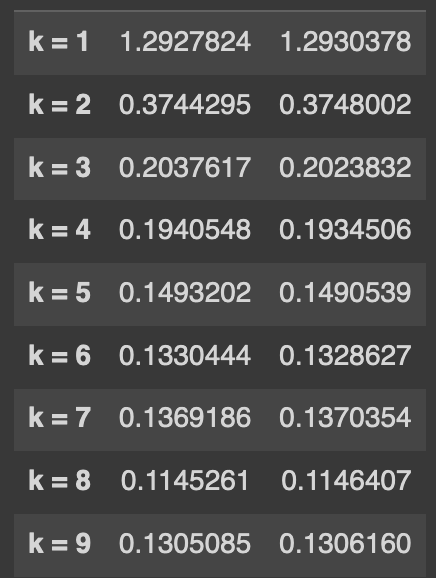

b) **Write Up Only**: Then answer, what does the simulation tell you about how the different k-level trimmed means perform for this setting? As part of your answer, answer what levels of $k$ seem to do best.
    

In [35]:
#a) 

set.seed(32)

#Define the parameters
numof_samples = 1000
sample_size = 20
true_mean = 0

#Generating 1000 random samples, each of size 20 from a Standard Cauchy distribution
samples = replicate(numof_samples, rcauchy(sample_size))

#Define trimmed mean function
trimmed_mean <- function(sample, k){
    return(mean(sample, trim = k/sample_size))
}

#Initialize mse_values and variance_values with zeros to store MSEs and Variances for different levels of k
mse_values <- numeric(9)
variance_values <- numeric(9)

#Apply trimmed_mean() to different levels of k
for (k in 1:9){
    trimmed_means <- apply(samples, 2, trimmed_mean, k=k)
    mse_values[k] <- mean((trimmed_means - true_mean)^2)
    variance_values[k] <- var(trimmed_means)
    
}

#Create a dataframe to display MSE and Variance for corresponding k values
result <- data.frame(K = 1:9, MSE = mse_values, Variance = variance_values)
result

K,MSE,Variance
<int>,<dbl>,<dbl>
1,1.0801142,1.0804489
2,0.3350300,0.3353145
3,0.2097437,0.2098581
4,0.1637350,0.1638111
5,0.1411365,0.1411582
6,0.1329718,0.1329720
7,0.1277343,0.1277475
8,0.1271557,0.1271596
9,0.1298129,0.1298495


#### b) It looks like as the k value increases i.e., as the number of outliers were trimmed the MSE and Variance seems to be lowered. When only 1 lowest and highest datapoints were removed then the MSE and Variance are way too high, and as the k value increases there is a gradual decrease in both variance and in MSE values until k=8, and when k=9 then there is very slight increase in both MSE and Variance. 

### Exercise 2: Studying outside the scope of the CLT

Recall that we simulated the CLT (Central Limit Theorem) phenomenon in class by creating 1000 averages, each average from a random sample of 100 random variables drawn from various distributions (normal, uniform, binomial, negative binomial, and Poisson).

a) **Code Up & Explain in Video**: Now create a similar simulation by modifying what we did in class, but explore the results of drawing only a sample size of 5 points from an exponential distribution with rate .2.  Draw a histogram of 1000 averages, and over it, draw the theoretical curve that the CLT says the average should follow for large samples.

*Hint.* As a test case, if you run `set.seed(1)` before any code for this that draws a random sample, you should get this output for your histogram:
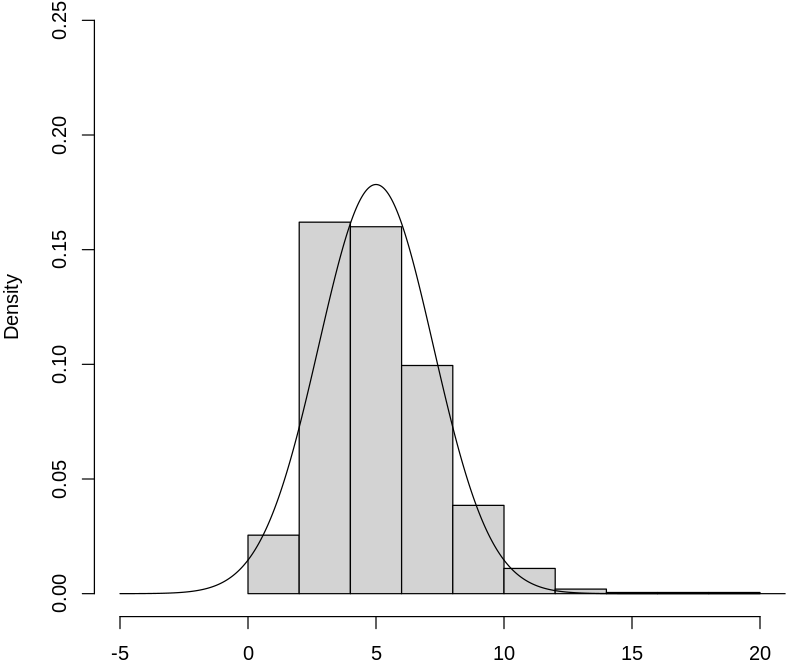


b) **Write Up Only**: Then answer, do the 1000 averages still seem to obey the CLT?

c) **Code Up & Explain in Video**: The CLT also doesn't say anything about the median but we can use simulations to explore its properties. Again modify what we did in class but explore the results of drawing a sample size of 100 points from an exponential distribution with rate .2. This time look at the histogram of 1000 medians rather than 1000 means. Again, plot the CLT theorem curve (as it applies to the mean) over it.

** Hint.** As a test case, if you run `set.seed(1)` before you draw your samples, you should get this as your histogram:
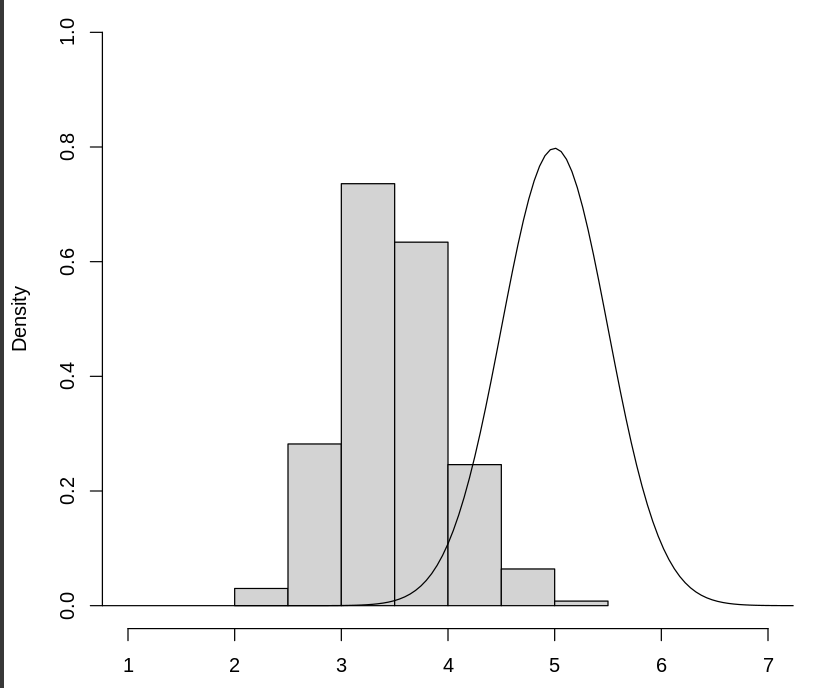


d)  **Write Up Only**: From part (c) , what do your results seem to suggest about the distributional properties for the median with respect to the CLT?


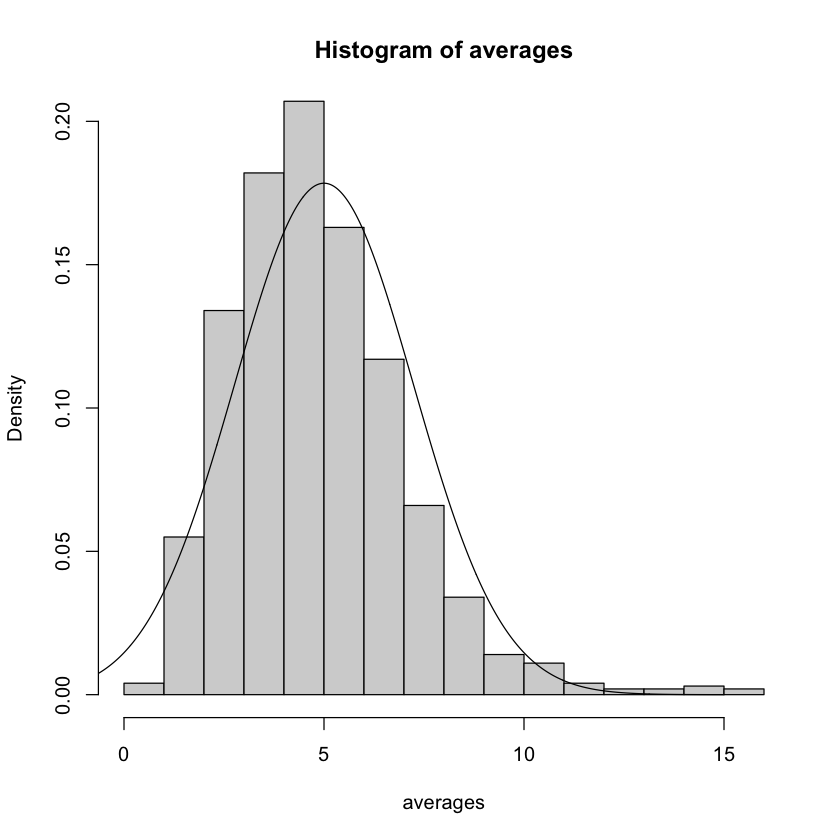

In [95]:
# a) 
set.seed(71)
sample_size = 5
numof_samples = 1000
rate = 0.2

#Generate 1000 averages of samples drawn from exponential distribution with rate = 0.2
averages = replicate(numof_samples, mean(rexp(sample_size, rate)))

#Calculate mean and variance of the sample means
mean = 1/rate
variance_orig_dist = 1/rate^2
variance__of_sample_means = variance_orig_dist/sample_size
sd = sqrt(variance__of_sample_means)

#Plot histogram and the curve
hist(averages, prob=TRUE, ylim = c(0,0.20))
x = seq(from = -2, to = 15, length = 1000)
lines(x, dnorm(x, mean = mean, sd = sd))

#### b) Based on the above plot it looks like the mean of the 1000 sample means in which each of the sample is of size 5 and are drawn from the exponential distribution, obeys the CLT. The histogram plot does not look like a perfect bell curve, it seemed to be skewed right a bit, that is most likely because of the small sample size. Even though the histogram and the line curve share the same mean the skewness is likely due to the small sample size, and the original exponential distribution. 

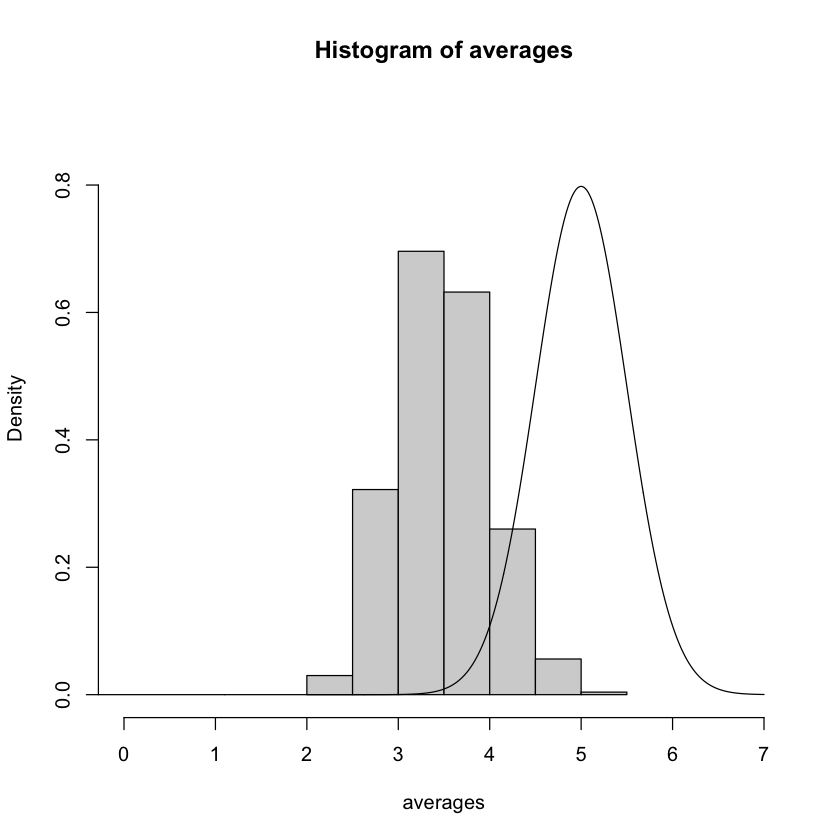

In [97]:
#c) 
set.seed(71)
sample_size = 100
numof_samples = 1000
rate = 0.2

#Generate 1000 medians of samples drawn from exponential distribution with rate = 0.2
averages = replicate(numof_samples, median(rexp(sample_size, rate)))

#Calculate mean and variance of the sample means
mean = 1/rate
variance_orig_dist = 1/rate^2
variance__of_sample_medians = variance_orig_dist/sample_size
sd = sqrt(variance__of_sample_medians)

#Plot histogram and the curve
hist(averages, prob=TRUE, ylim = c(0,0.90),xlim = c(0,7))
x = seq(from = -5, to = 7, length = 1000)
lines(x, dnorm(x, mean = mean, sd = sd))

#### d) We can observe the difference in the histogram's mean and the line curve mean, even with the large sample size (>30) the two plots are not aligned. This suggests that the median doesn't agree with Central Limit Theorem like mean does. 

### Exercise 3

We saw a problem where 5 students sat in a room that was scaled to the unit square. Now consider a situation where 10 students are sitting in a rectangular room, but their positions can only take on discrete values because they sit in chairs which are arranged in rows and columns. The seats are in rows 1, 2, ..., 6 and columns 1, 2, ..., 5.  The students are sitting in the seats located at the following pairs of (row, column):

(1, 3); (1, 4); (1; 5);

(2, 3);

(4, 2); (4, 4); (4, 5);

(5, 1); (5, 2);

(6, 3)

#### a) **Code Up & Explain in Video**: Create a simulation with 1000 runs to conduct a one-sided hypothesis test about how students are sitting around the classroom. For simplicity, don't worry about the fact that two students cannot sit in the same spot. Your simulation should have two outputs: a histogram of your simulated distance values with a vertical line through it that represents the statistic for the actual data; and the approximate p-value that we would see data as extreme as this data (one sided test) if the students really were sitting randomly, independently discretely uniformly around the classroom. In your explanation of your code, make sure you justify which direction you test in for your video.

**Hint.** To help you make sure your code is right, as a test case: If you use `set.seed(1)` at the beginning of your code before you do any random draws, you should get this output for your histogram.
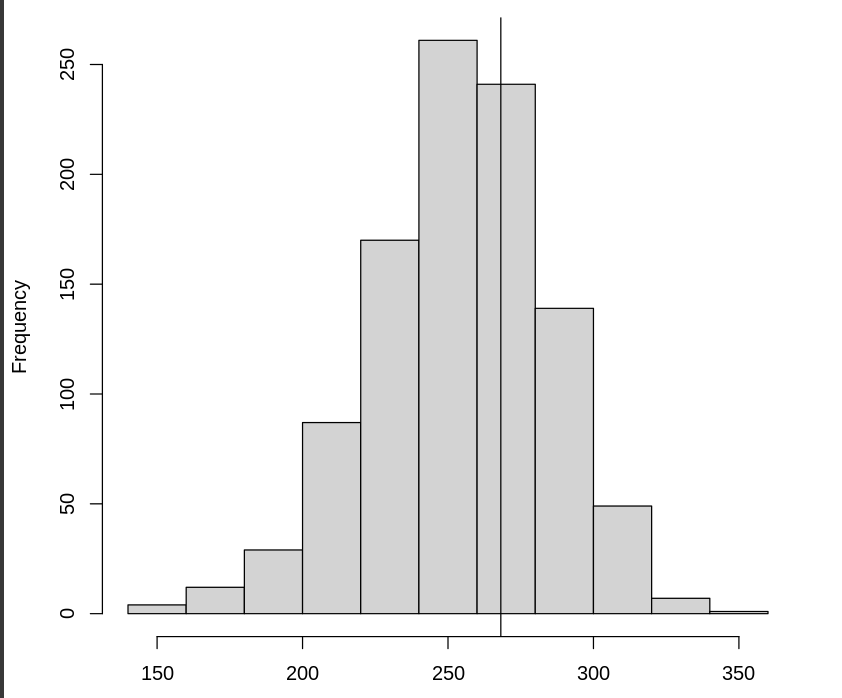

#### b) **Write Up Only**: Then answer: what is your conclusion about how students sat in class? Use hypothesis testing at the $\alpha=.05$ level.



Approximate p-value: 0.345 


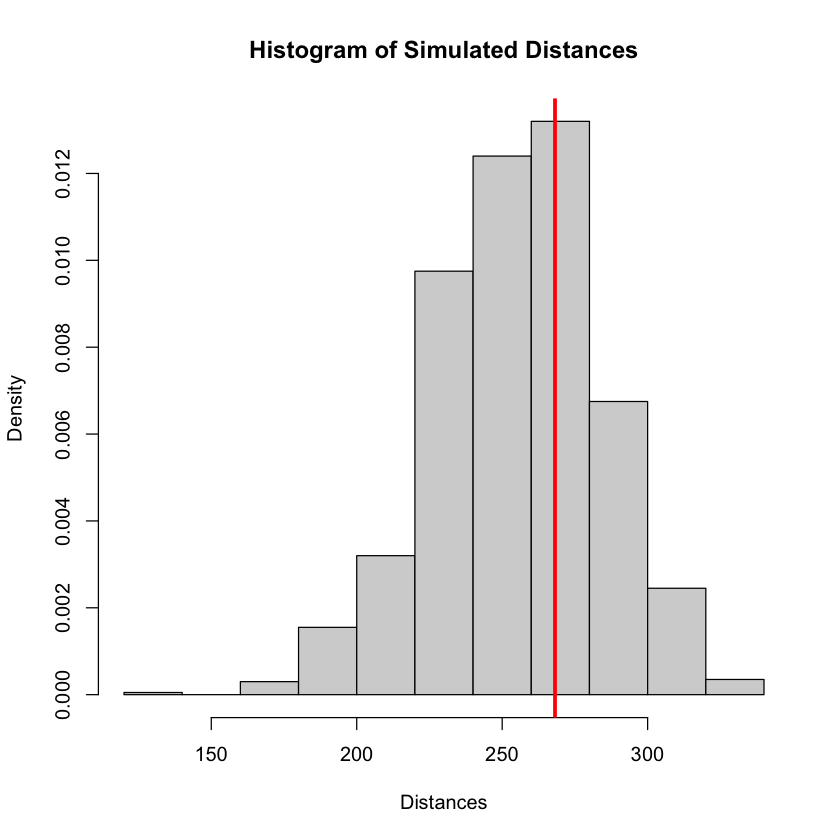

In [6]:
# Student seating coordinates
xcord <- c(1, 1, 1, 2, 4, 4, 4, 5, 5, 6)  # Row positions
ycord <- c(3, 4, 5, 3, 2, 4, 5, 1, 2, 3)  # Column positions

# Define function to calculate the pairwise distances for given x and y coordinates using distance formula
pointDistances <- function(xVec, yVec) {
    n <- length(xVec)
    total <- 0
    for (i in 1:n) {
        for (j in 1:n) {
            # Calculate distance between each pair of points
            distanceBtwPair <- sqrt((xVec[i] - xVec[j])^2 + (yVec[i] - yVec[j])^2)
            total <- total + distanceBtwPair
        }
    }
    return(total)
}

# Calculate the total distance for given seating positions and store it in distance_xy
distance_xy <- pointDistances(xcord, ycord)

# Simulation parameters
numStudents <- 10
runs <- 1000
simulated_distances <- numeric(runs)  # Initialize vector to store distances

# Simulate random seating for students and calculate the pairwise distances
set.seed(15)
for (i in 1:runs) {
    studentsX <- sample(1:6, numStudents, replace = TRUE)  # Random row positions
    studentsY <- sample(1:5, numStudents, replace = TRUE)  # Random column positions
    simulated_distances[i] <- pointDistances(studentsX, studentsY)  # Store distances
}

# Calculate the p-value based on the actual distance
sIsExtreme <- numeric(runs)  # Initialize vector to store extreme values
for (i in 1:runs) {
    s <- simulated_distances[i]
    # Check if the actual data statistic is more extreme
    if (distance_xy > mean(simulated_distances)) {
        sIsExtreme[i] <- (s > distance_xy) 
    } else {
        sIsExtreme[i] <- (s < distance_xy)
    }
}

#p-value calculation for one-sided test
sIsExtreme <- simulated_distances > distance_xy  #Check if simulated distances are greater
p_value <- mean(sIsExtreme)  # Proportion of simulations where the distance is greater
cat("Approximate p-value:", p_value, "\n")


# Plot the histogram
hist(simulated_distances, prob = TRUE, xlab = "Distances", main = "Histogram of Simulated Distances")
abline(v = distance_xy, col = "red", lwd = 3) # Actual data statistic

#### b) Null Hypothesis (H0): Observed distance is equal to simulated distances(The seating arrangement of students is random) 
####    Alternate Hypothesis (Ha): Observed distance is greater than mean of simulated distances

#### After conducting the test, I obtained a p-value of 0.345. For an alpha level of 0.05, the p-value I got is greater than the alpha value, so we fail to reject the null hypothesis. Hence, we can conclude that the students are sitting in random manner. 

### Exercise 4: Performance of the Gini Index

Let $X$ be a non-negative random variance with $\mu=\mathbb{E}X <\infty$. For a random sample $x_1, \ldots, x_n$ from the distribution of $X$, the Gini ratio is defined by

$$
G = \frac{1}{2n^2\mu}\sum_{j=1}^{n}\sum_{i=1}^{n}|x_i-x_j|.
$$

The Gini ratio is a measure of income equality (used in Economics).

a) **Code Up & Explain in Video**: If the mean is unknown, let $\hat{G}$ be the statistic $G$ with $\mu$ replaced by $\bar{x}$. Estimate using 1000 samples (each sample size 100) the mean and standard error of $\hat{G}$ if $X$ is Uniform(0, 1).

b) **Code Up & Explain in Video**: Also estimate the mean and standard error using 1000 samples if $X$ is Bernoulli(0.1).

** Hint.** To check that your code is on the right track, as a test case, if you run `set.seed(1)` before you run your Bernoulli samples, the mean should be `0.331318360208928` and standard error should be `0.0235724481450571`.

c) **Write Up Only**: Then in a sentence or two, analyze what the means and standard errors tell you about the Gini index for these two distributions.

In [9]:
#a) 
# Set parameters for the total simulations and size of each sample
total_simulations <- 1000
size_of_sample <- 100

# Define a function to calculate the Gini index
calculate_Gini <- function(data_vector) {
  data_length <- length(data_vector) # Get the size of the sample
  mean_value <- mean(data_vector) # Calculate the mean of the sample
  ordered_data <- sort(data_vector) # Sort the sample values
  # Calulate the Gini index using ordered statistics
  Gini_index <- sum((2 * 1:data_length - data_length - 1) * ordered_data) / (data_length^2 * mean_value)
  return(Gini_index) # Return the computed Gini index
}

# Generate 1000 Gini indices from samples of size 100 drawn from a Uniform(0, 1) distribution
Gini_results_uniform <- replicate(total_simulations, calculate_Gini(runif(size_of_sample)))

# Estimate the mean of the Gini indices
average_Gini_uniform <- mean(Gini_results_uniform)
# Estimate the standard error of the Gini indices
standard_error_Gini_uniform <- sd(Gini_results_uniform)

cat("Mean of Gini (Uniform) value:", average_Gini_uniform, "\n")
cat("Standard Error of Gini (Uniform) value:", standard_error_Gini_uniform, "\n")

Mean of Gini (Uniform) value: 0.3313572 
Standard Error of Gini (Uniform) value: 0.02404534 


In [10]:
#b)
# Function to create Bernoulli samples
create_bernoulli_samples <- function(sample_size, probability) {
  return(rbinom(sample_size, 1, probability))
}

# Generate 1000 Gini index values from samples of size 100 drawn from a Bernoulli(0.1) distribution
Gini_values_bernoulli <- replicate(total_simulations, calculate_Gini(create_bernoulli_samples(size_of_sample, 0.1)))

# Estimate the mean and standard error of the Gini index for Bernoulli distribution
average_Gini_bernoulli <- mean(Gini_values_bernoulli)
standard_error_Gini_bernoulli <- sd(Gini_values_bernoulli)

cat("Mean of Gini (Bernoulli) value:", average_Gini_bernoulli, "\n")
cat("Standard Error of Gini (Bernoulli) value:", standard_error_Gini_bernoulli, "\n")

Mean of Gini (Bernoulli) value: 0.90142 
Standard Error of Gini (Bernoulli) value: 0.03041889 


#### c) The mean Gini index for the uniform distribution (0.332) suggests moderate inequality, while the Bernoulli distribution (0.900) indicates high inequality. The small standard errors show that these estimates are reliable and consistent.